In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
df = pd.read_csv('../data/raw/recommendation_training_data.csv')

In [4]:
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286


In [5]:
# make copy of music_df
df_log_t = df.copy()

# listing all columns that are float64 type EXCEPT for age
cols_for_transforming = ['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings']

# for all columns with data float64 except for age, perform log transformation
for c in cols_for_transforming:
    df_log_t[c] = np.log(df[c])

In [6]:
columns_to_drop = ['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'lyrics']

In [7]:
df_log_t_drop = df_log_t.drop(columns_to_drop, axis=1)

In [8]:
df_log_t_drop.drop(['genre', 'topic'], axis =1, inplace=True)

In [9]:
df_log_t_drop

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,-7.421776,-2.752847,-7.421776,-7.421776,-7.421776,-3.018857,-4.068423,-1.332750,-7.421776,-3.236827,-7.421776,-7.421776,-7.421776,-0.966798,-2.144083,1.000000
1,51,-3.337177,-2.335349,-0.813204,-6.658011,-6.658011,-3.611642,-6.658011,-6.658011,-6.658011,-2.136784,-6.658011,-1.547962,-2.973497,-6.658011,-6.658011,1.000000
2,24,-5.888878,-5.888878,-5.888878,-5.888878,-5.888878,-5.888878,-1.841594,-1.383626,-5.888878,-1.127648,-5.888878,-5.888878,-5.888878,-5.888878,-1.489780,1.000000
3,54,-3.031378,-6.470799,-6.470799,-6.470799,-3.839686,-6.470799,-0.887859,-6.470799,-6.470799,-6.470799,-2.046008,-6.470799,-6.470799,-1.487709,-6.470799,1.000000
4,48,-6.608000,-6.608000,-0.872819,-6.608000,-6.608000,-6.608000,-0.769100,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-3.514773,-2.676549,-6.608000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,78,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-6.608000,-0.937384,-6.608000,-0.832205,-6.608000,-6.608000,-2.723199,-6.608000,0.014286
28358,67,-6.658011,-6.658011,-3.342794,-6.658011,-6.658011,-6.658011,-2.713206,-1.590182,-1.142846,-2.844694,-2.002813,-6.658011,-6.658011,-6.658011,-6.658011,0.014286
28359,77,-6.499787,-1.868841,-1.777929,-6.499787,-3.225008,-6.499787,-3.341008,-6.499787,-1.030903,-6.499787,-2.678237,-6.499787,-6.499787,-6.499787,-6.499787,0.014286
28360,67,-6.728629,-6.728629,-6.728629,-6.728629,-3.029107,-6.728629,-6.728629,-6.728629,-0.708395,-2.267082,-6.728629,-1.596230,-6.728629,-6.728629,-6.728628,0.014286


# PCA without scaling data

In [10]:
pca = PCA()
pca.fit(df_log_t_drop)

PCA()

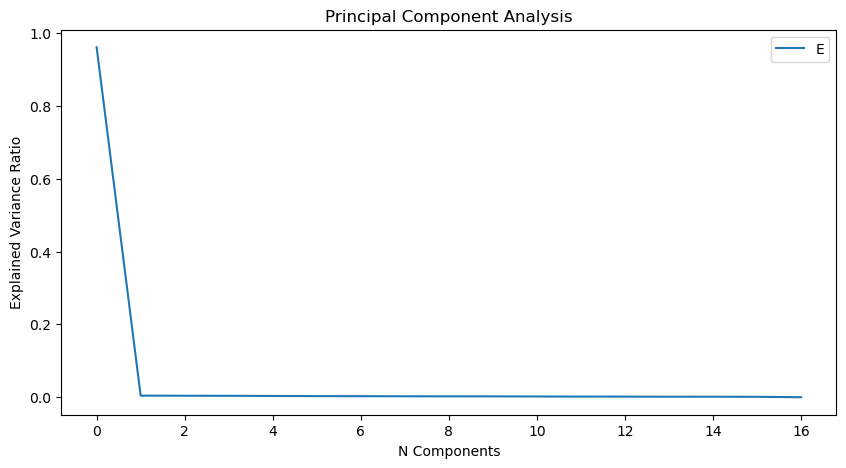

In [11]:
plt.figure(figsize=(10,5))
plt.title('Principal Component Analysis')
plt.plot(pca.explained_variance_ratio_)
plt.legend('Explained Variance')
plt.xlabel('N Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [12]:
X = df_log_t_drop.copy()

pca = PCA(n_components=3)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

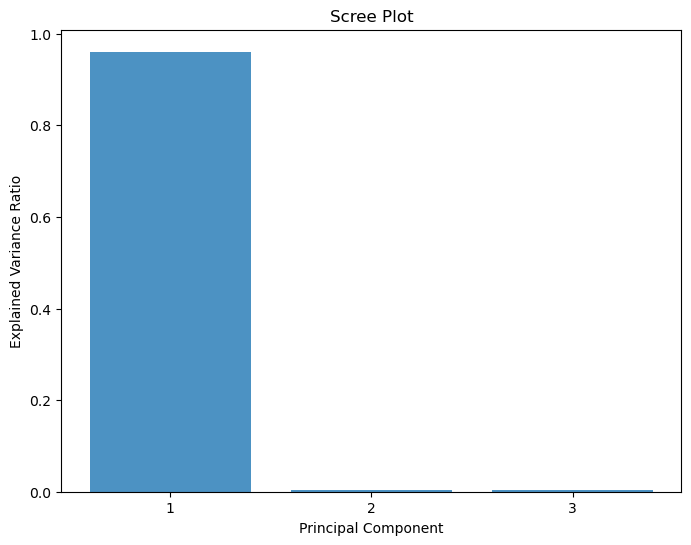

In [13]:
# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))

plt.show()

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

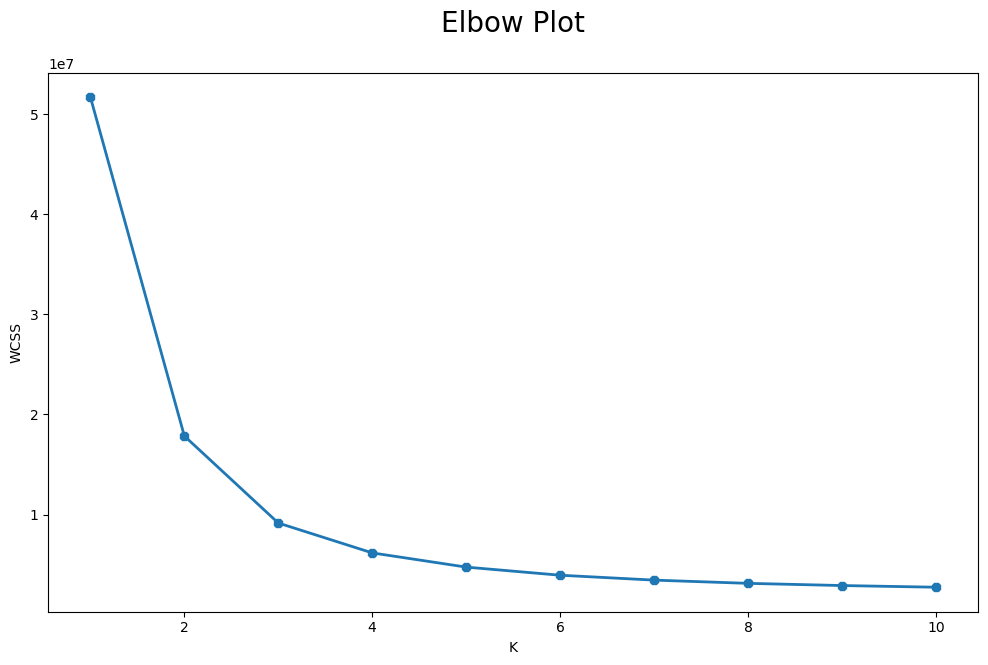

In [14]:
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

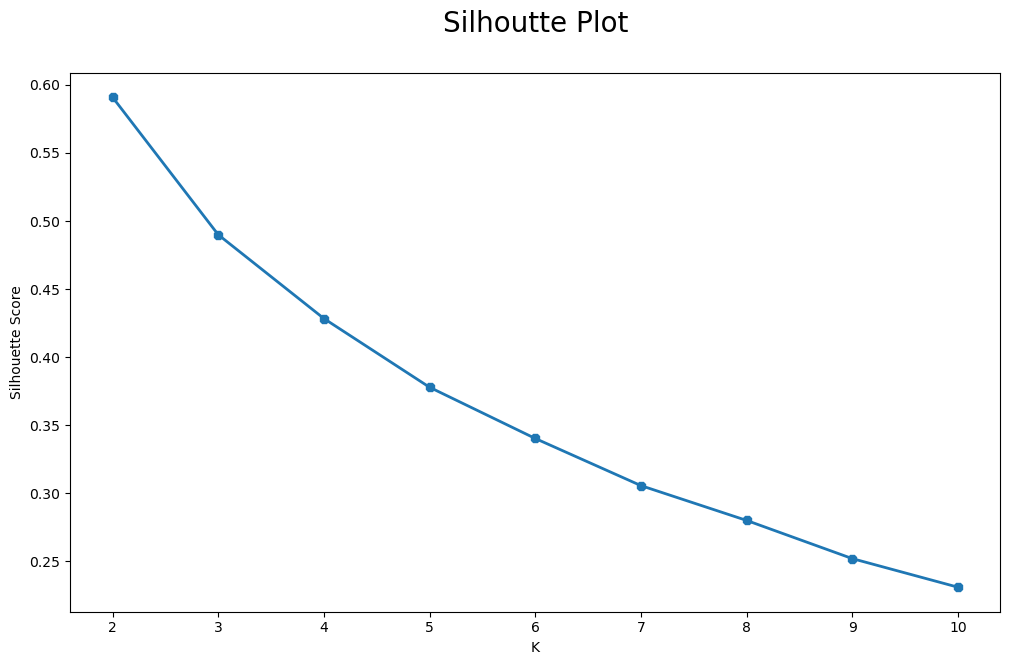

In [15]:
# create a plot of silhoutte score

silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X.values)
    silhouette.append(metrics.silhouette_score(X, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X.values)

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [17]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X.values)
labels

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [18]:
kmeans.cluster_centers_

array([[ 85.50821436,  -5.9803188 ,  -4.22545438,  -4.39127556,
         -5.11407247,  -5.80633823,  -5.97058139,  -5.55932638,
         -4.68586713,  -5.16731202,  -5.34828729,  -5.3151853 ,
         -5.22367165,  -5.64211398,  -4.37098889,  -5.56980972,
          0.38006622],
       [155.66325224,  -6.14028613,  -4.31493336,  -4.80142071,
         -5.6197929 ,  -5.5216956 ,  -6.04546432,  -6.26051587,
         -4.87715022,  -2.88042806,  -5.67911603,  -4.98488961,
         -5.59729045,  -5.79237693,  -5.60928369,  -5.77399542,
          0.30712639],
       [ 41.38992341,  -5.59698381,  -4.6813217 ,  -4.00941976,
         -4.85893793,  -5.78573515,  -5.69243985,  -4.76668356,
         -4.45436928,  -5.49530277,  -4.86614306,  -5.45116146,
         -4.9855661 ,  -5.42482229,  -3.77093037,  -5.2099133 ,
          0.48992742]])

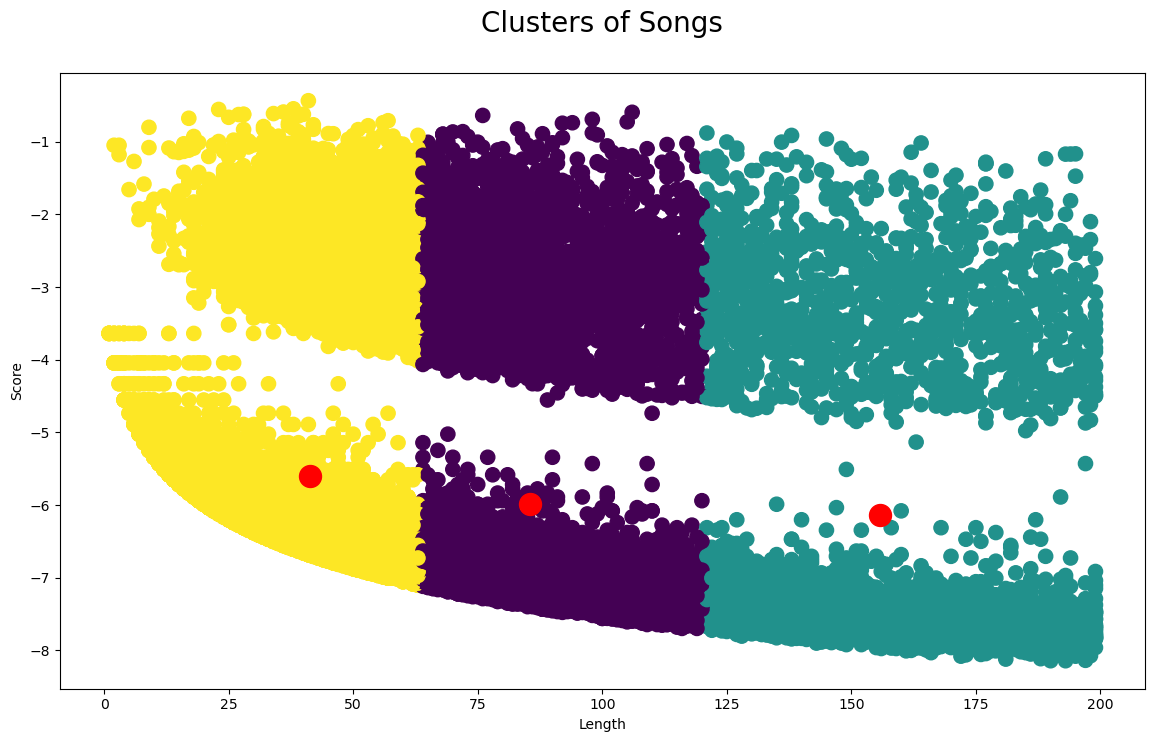

In [19]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X.values[:, 0], X.values[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Songs\n', fontsize = 20)
plt.xlabel('Length')
plt.ylabel('Score')
plt.show()

Did a quick run through of a secondary model where columns were not scaled.